In [140]:
import pandas as pd
import numpy as np
from scipy.stats import skew, skewtest

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train['Set'] = 'train'
test['Set'] = 'test'

target = train['SalePrice']
train.drop('SalePrice', axis=1, inplace=True)

data = pd.concat([train, test], ignore_index=True)
display(data.head())
print(data.shape)
print(train.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Set
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,train


(2919, 81)
(1460, 81)


In [141]:
# drop features with very high missing values
data.drop('MiscFeature', axis=1, inplace=True)
#display(data.head())

In [142]:
def check_nan(data):
    null_val = data.isnull().sum()
    print(null_val[null_val>0])

In [143]:
#skew(data['GarageArea'], nan_policy='omit')
#skewtest(data['GarageArea'], nan_policy='omit')
#data['SaleType'].value_counts()

In [144]:
mode = ['MSZoning', 'Utilities', 'MasVnrType', 'BsmtFullBath', 'BsmtHalfBath',
        'GarageType', 'Functional', 'SaleType', 'KitchenQual', 'Exterior1st',
        'Exterior2nd', 'Electrical']
median = ['LotFrontage', 'MasVnrArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
          'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
none = ['Alley', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'GarageQual',
        'PoolQC', 'Fence']
no_bsmt = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond']

In [145]:
# fill missing values

def fill_mode(data):
    # fill the missing values of data[feature] with the mode of the feature
    for feature in mode:
        data.loc[data[feature].isnull(), feature] = str(data[feature].mode())

def fill_median(data):
    # fill the missing values of data[feature] with the median of the feature
    for feature in median:
        data.loc[data[feature].isnull(), feature] = data[feature].median()

def fill_none(data):
    # fill the missing values of data[feature] with 'none'
    for feature in none:
        data.loc[data[feature].isnull(), feature] = 'none'
def fill_no_bsmt(data):
    # fill the missing values of basement features witn 'no_bsmt'
    for feature in no_bsmt:
        data.loc[data[feature].isnull(), feature] = 'no_bsmt'

In [146]:
fill_mode(data);fill_median(data);fill_none(data);fill_no_bsmt(data)

In [147]:
check_nan(data)

GarageYrBlt    159
dtype: int64


In [148]:
data.loc[data.GarageYrBlt.isnull(), 'GarageYrBlt'] = float(data.loc[data.GarageType=='Attchd', 'GarageYrBlt'].mode())
#garage.value_counts()

In [149]:
check_nan(data)

Series([], dtype: int64)


In [150]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.088386,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.398253,...,472.877013,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,21.317898,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.534750,...,215.357944,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [151]:
data = pd.get_dummies(data.drop('Set', axis=1))
X_train = data[0:1460]
X_test = data[1460:]

print(X_train.shape)
print(X_test.shape)
print(target.shape)
#print(X_test.iloc[0, :])

(1460, 314)
(1459, 314)
(1460,)


In [152]:
check_nan(target)

[]


In [153]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, target)

RandomForestRegressor()

In [154]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importances'] = regr.feature_importances_
features.sort_values(by=['importances'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

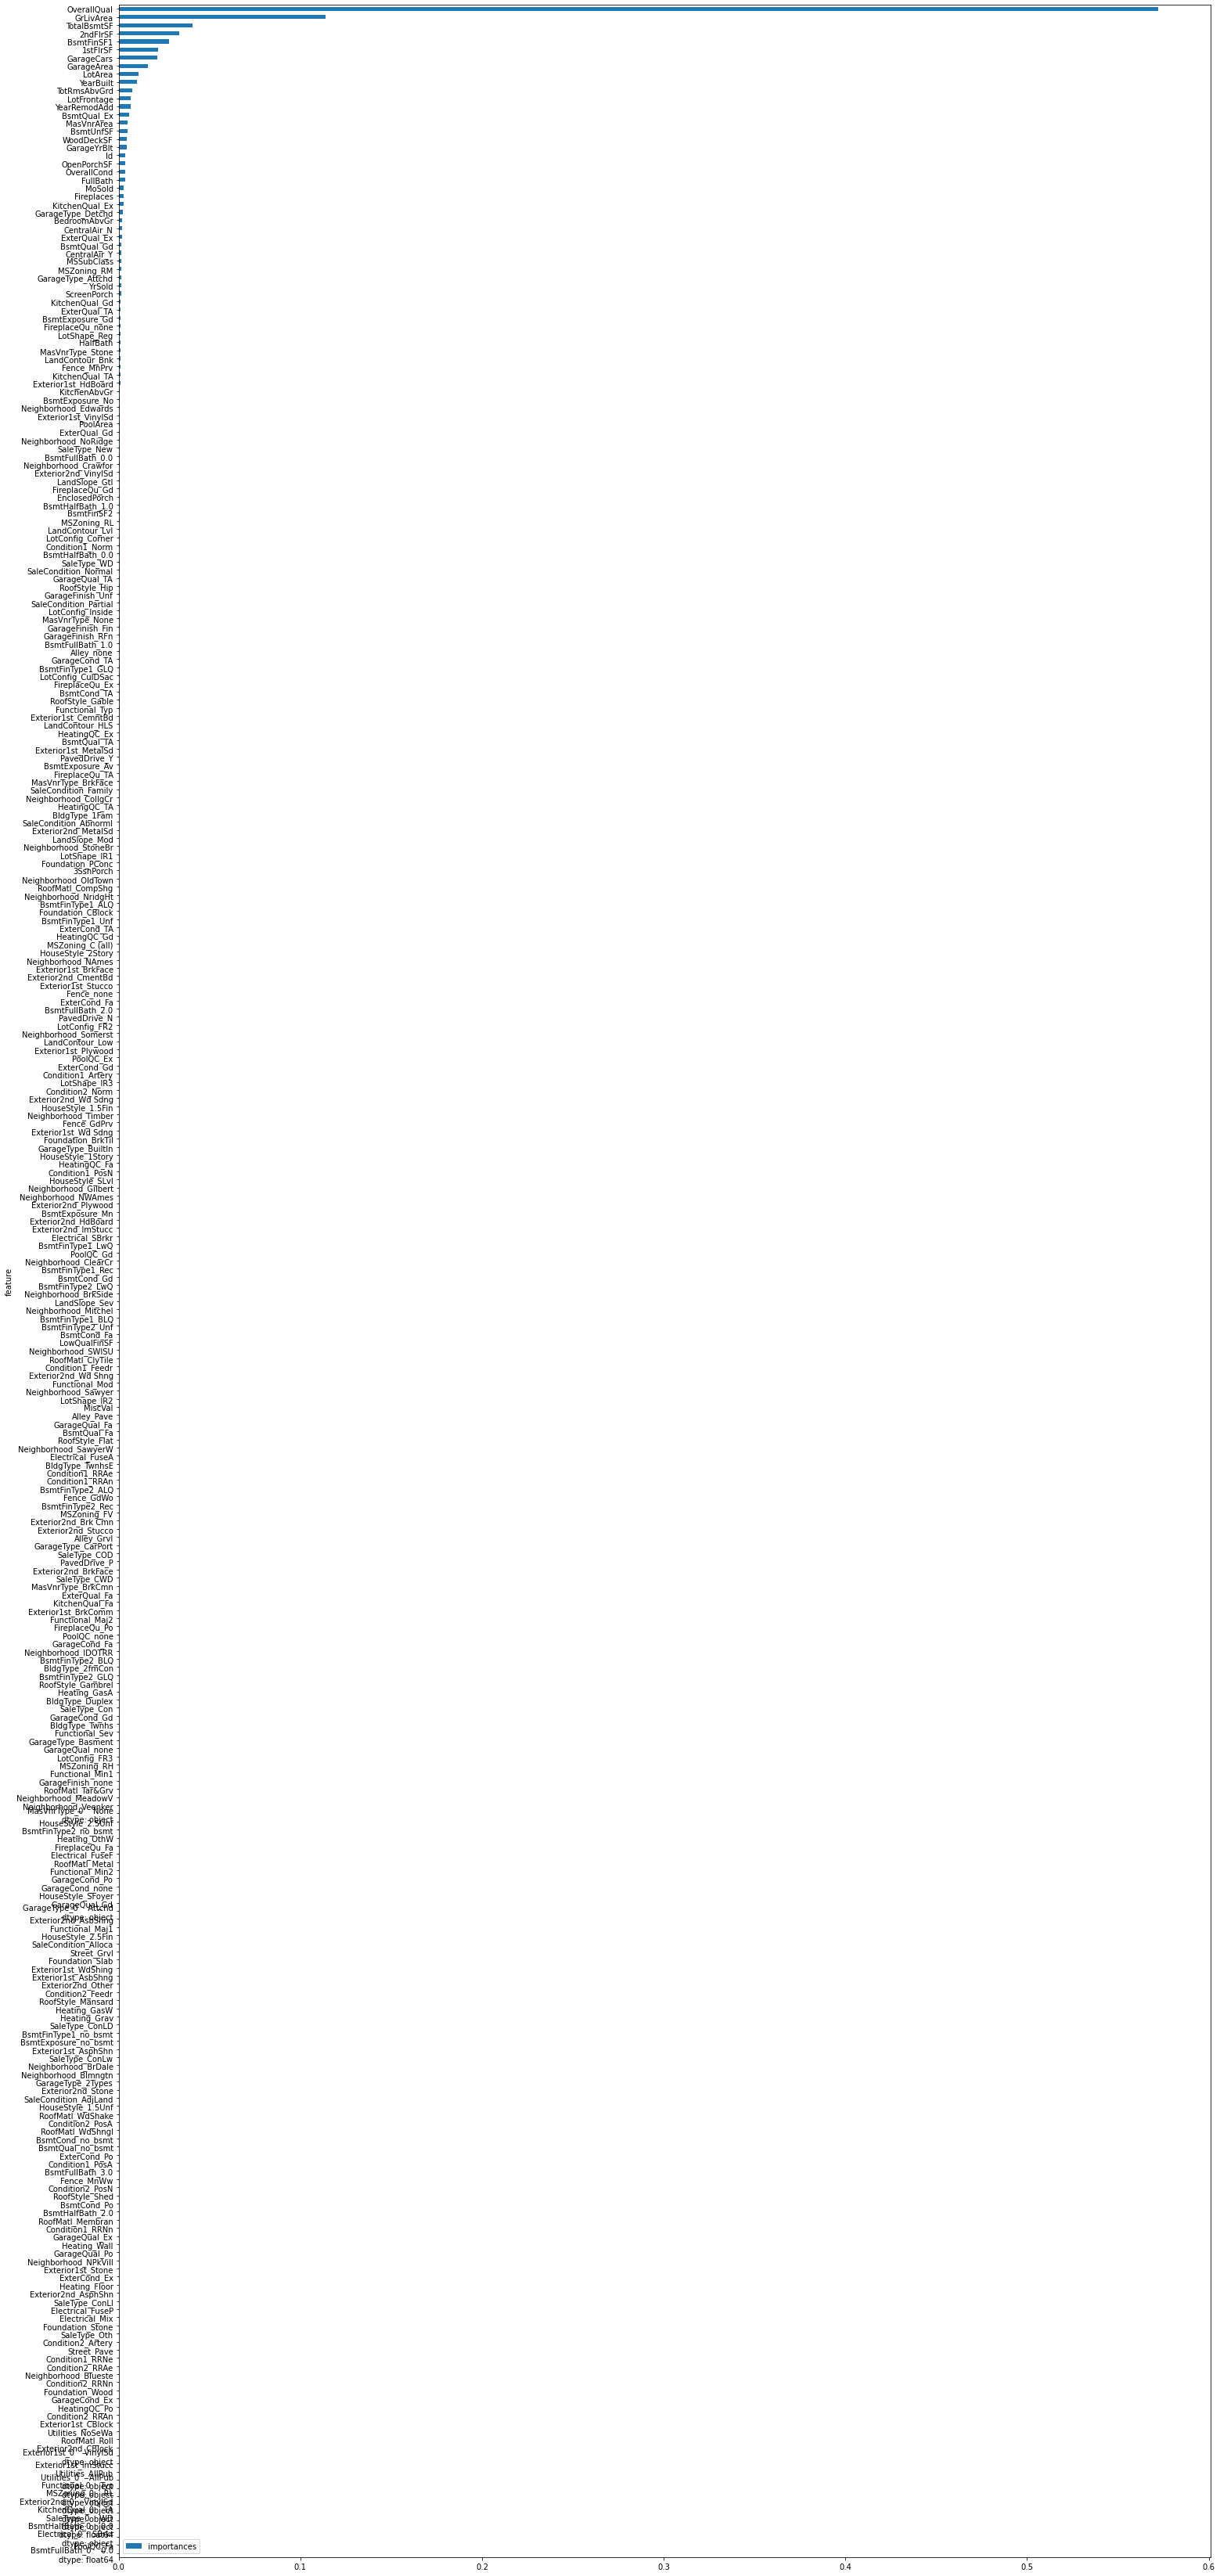

In [155]:
features.plot(kind='barh', figsize=(25, 60))

In [156]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(regr, prefit=True)
X_train_reduced = model.transform(X_train)
X_test_reduced = model.transform(X_test)
print(X_train_reduced.shape)
print(X_test_reduced.shape)

(1460, 22)
(1459, 22)


In [159]:
from sklearn.ensemble import GradientBoostingRegressor

gdb_regr = GradientBoostingRegressor(random_state=0)
gdb_regr.fit(X_train_reduced, target)

print("Performance on training set: {}%".format(gdb_regr.score(X_train_reduced, target)))

Performance on training set: 0.9588026809955792%


In [160]:
pred = gdb_regr.predict(X_test_reduced)
df = pd.DataFrame()
df['Id'] = test['Id']
df['SalePrice'] = pred
df.to_csv(r'C:\Users\USER\Desktop\my_pythonfiles_\kaggle\house_prices\result.csv', index=False)

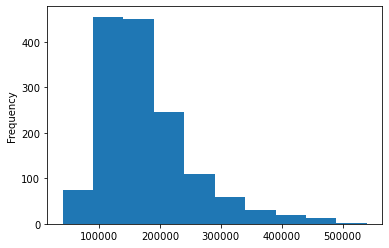

In [162]:
df['SalePrice'].plot(kind='hist')